In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv(r"D:\ineuron\MachineLearningFiles\MLAlgos\ML3\KNN\KNN\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


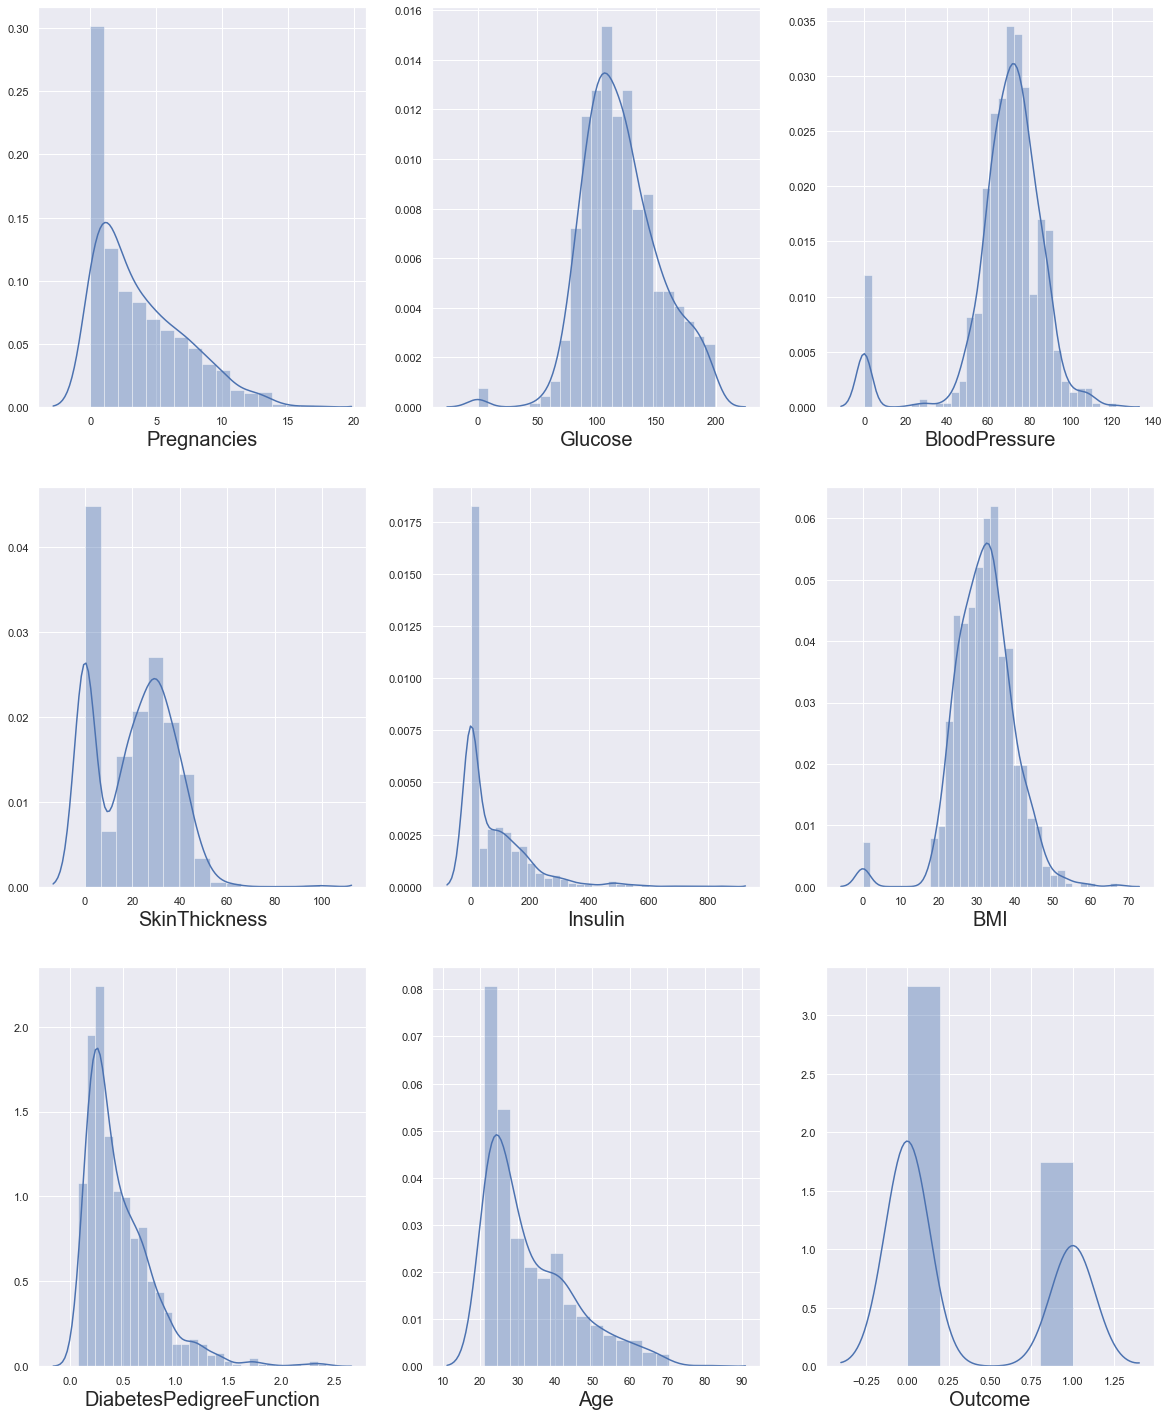

In [4]:
#Check data Distribution
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [ ]:
# replacing zero values with the mean of the column #BloodPressure #Glucose # #Insulin #BMI

In [8]:
data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())

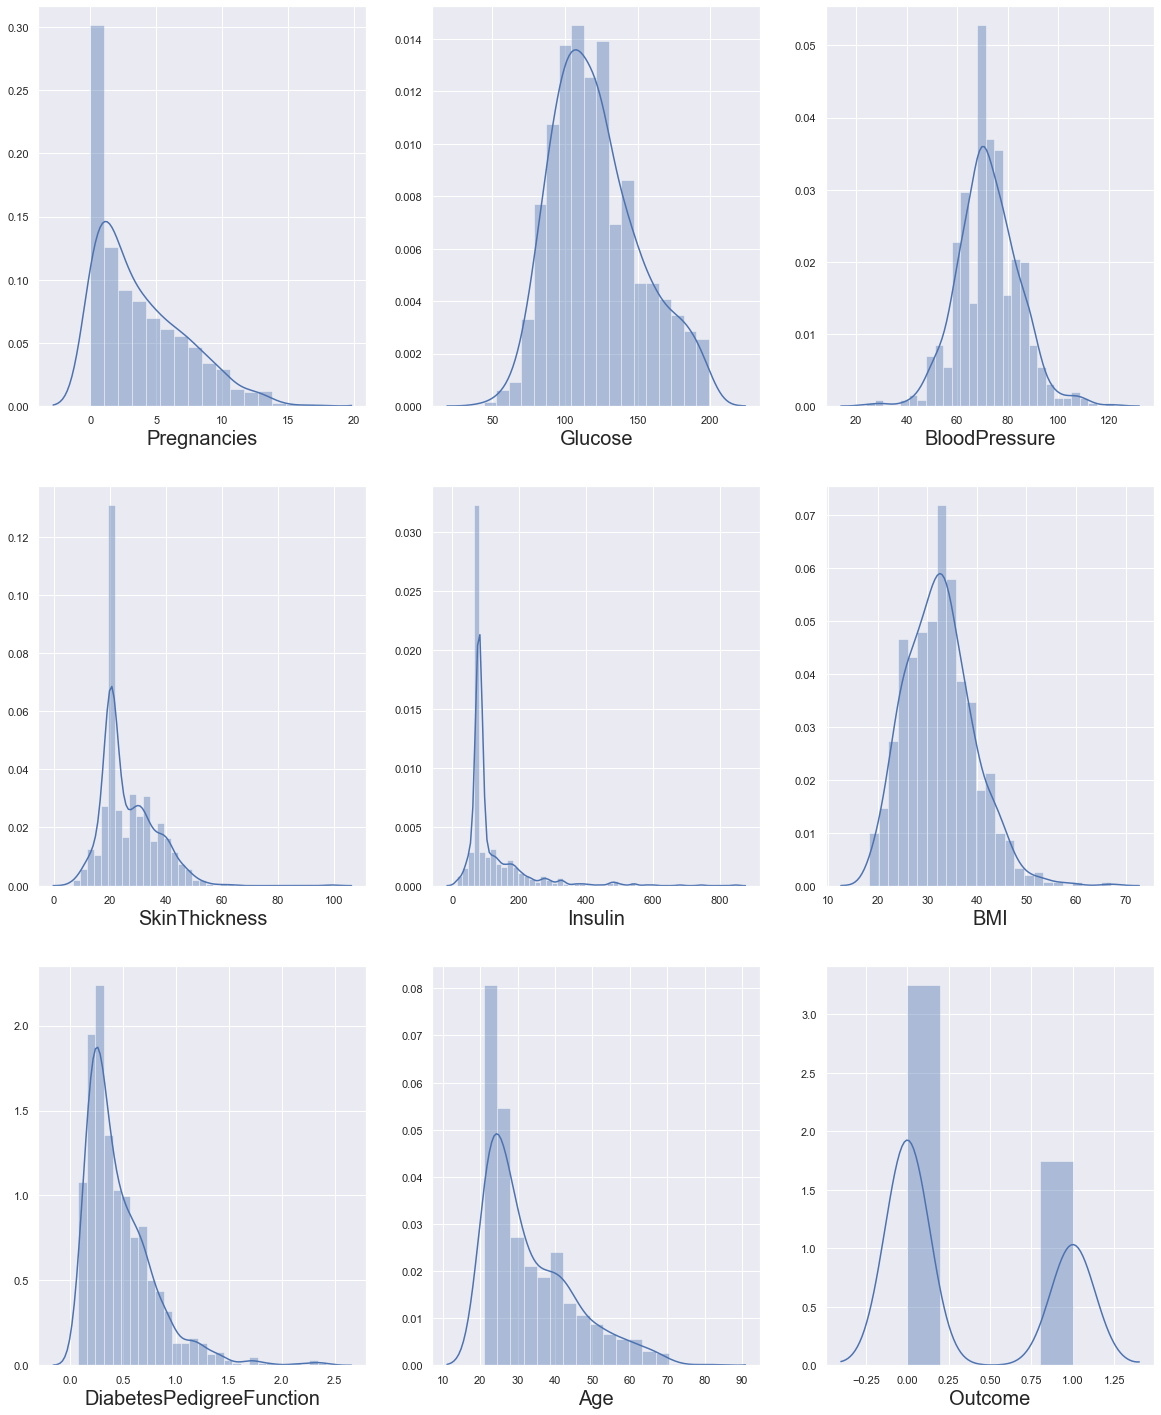

In [9]:
#Check data Distribution
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

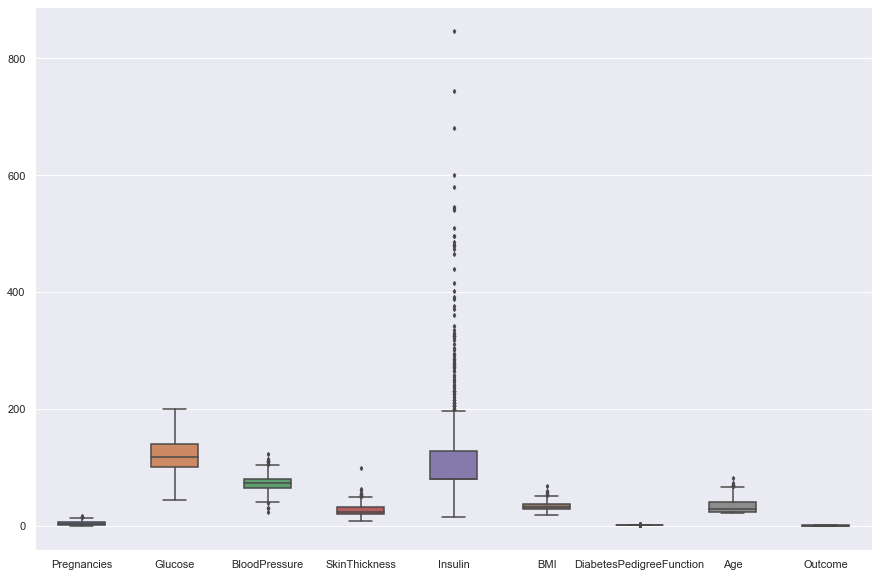

In [11]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
q=data["Insulin"].quantile(0.95)
data_cleaned=data[data["Insulin"]<q]

q=data_cleaned["Pregnancies"].quantile(0.98)
data_cleaned=data[data["Pregnancies"]<q]

q=data_cleaned["SkinThickness"].quantile(0.99)
data_cleaned=data[data["SkinThickness"]<q]

q=data_cleaned["BMI"].quantile(0.99)
data_cleaned=data[data["BMI"]<q]

q=data_cleaned["DiabetesPedigreeFunction"].quantile(0.99)
data_cleaned=data[data["DiabetesPedigreeFunction"]<q]

q=data_cleaned["Age"].quantile(0.99)
data_cleaned=data[data["Age"]<q]


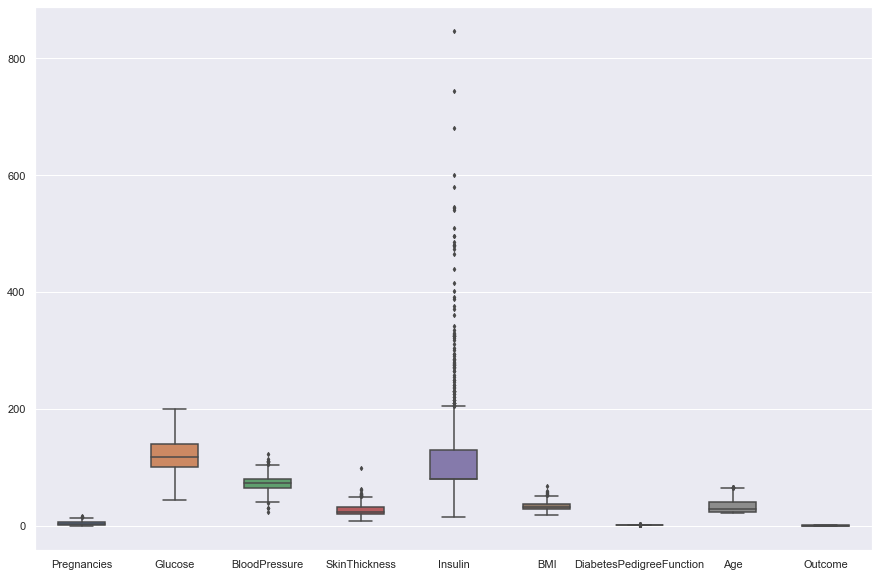

In [37]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned,width=0.5,ax=ax,fliersize=3)

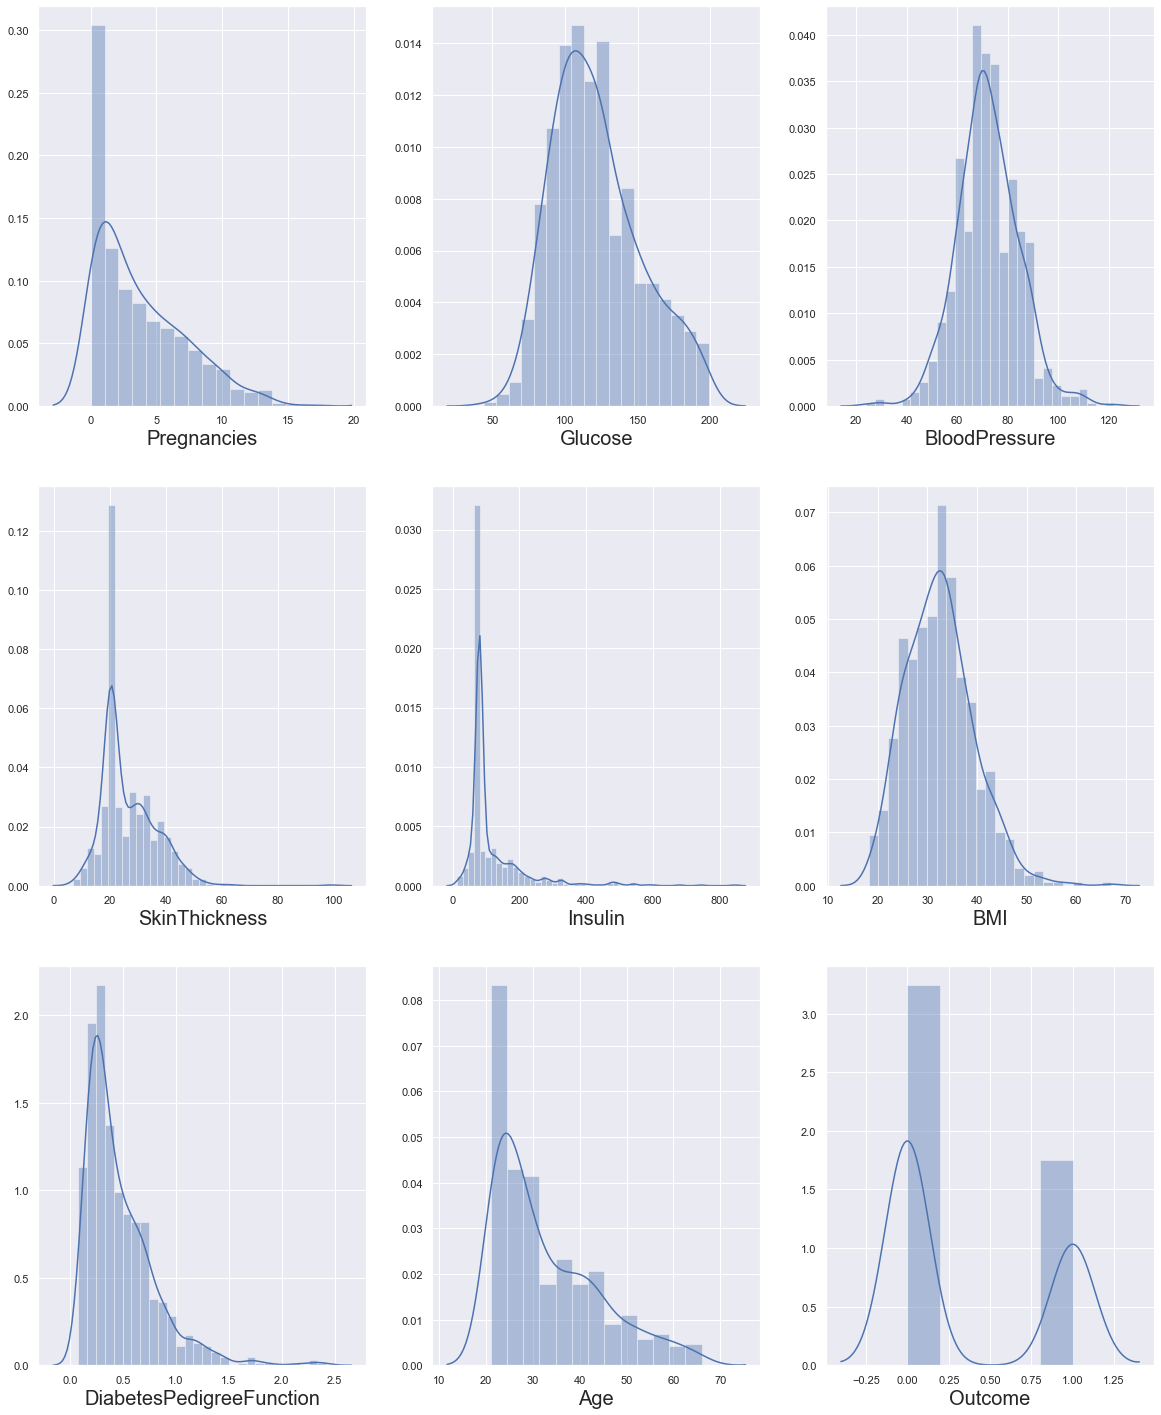

In [39]:
#Check data Distribution
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data_cleaned:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [41]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [44]:
x=data_cleaned.drop(columns="Outcome")
y=data_cleaned["Outcome"]

In [45]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [46]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

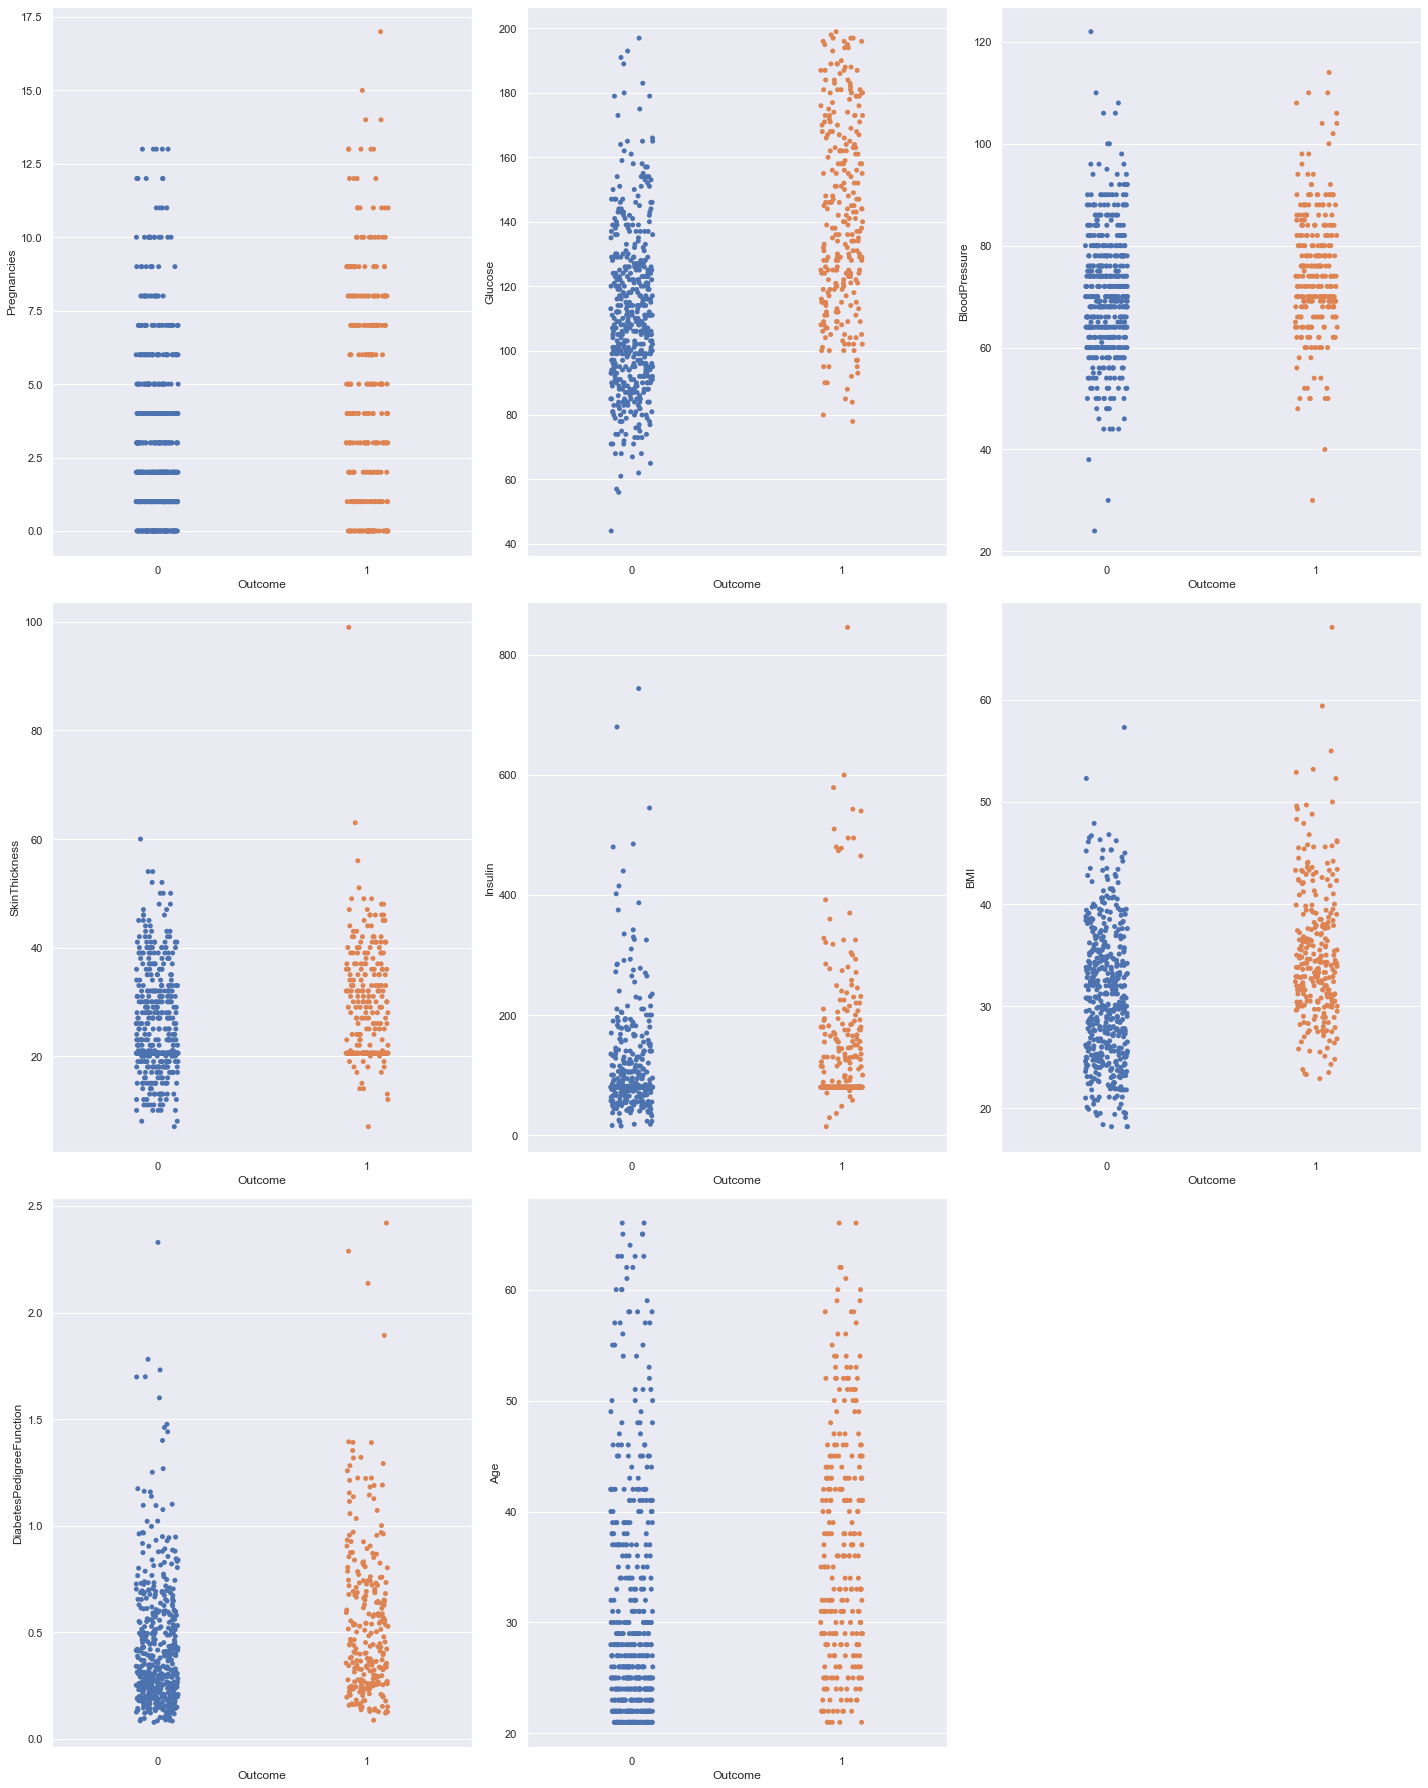

In [49]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [50]:
#Scale the data
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [51]:
x_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

In [60]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Fetures"]=x.columns

vif

,vif,Fetures
0,1.484572,Pregnancies
1,1.354580,Glucose
2,1.247898,BloodPressure
3,1.455095,SkinThickness
4,1.264776,Insulin
5,1.551161,BMI
6,1.058847,DiabetesPedigreeFunction
7,1.680199,Age


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25)

In [65]:
# let's fit the data into kNN model and see how well it performs:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
y_pred=knn.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [68]:
y_test

334    0
378    1
589    0
317    1
241    0
      ..
208    0
732    1
650    0
724    0
124    1
Name: Outcome, Length: 190, dtype: int64

In [70]:
#Score Of training 
knn.score(x_train,y_train)

0.8312829525483304

In [73]:
#Score Of testing
accuracy_score(y_test,y_pred)

0.7210526315789474

In [74]:
#Let's try to increase the accuracy by using hyperparameter tuning.


In [75]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [76]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [78]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.719, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.825, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.737, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.770, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.746, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=13, score=0.807, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=13, score=0.754, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=13, score=0.805, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=3, score=0.719, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=3, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=3, score=0.825, to

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=12, score=0.779, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.719, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.807, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.754, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.805, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=3, score=0.719, t

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.719, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.719, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.807, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.763, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.796, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.702, 

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.711, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.789, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.781, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.796, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=11, score=0.719, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=11, score=0.719, 

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, score=0.746, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, score=0.770, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.728, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.711, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.789, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.781, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.796, total=   0.0s
[C

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.743, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.728, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.693, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.789, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.746, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.770, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=10, score=0.728, total=   0.0s
[CV] a

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=3, score=0.825, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=3, score=0.737, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=3, score=0.770, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.746, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.693, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.781, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=5, score=0.746, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=12, score=0.789, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=12, score=0.737, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=12, score=0.779, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.719, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.711, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.807, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.754, total=   0.0s


[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.781, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.796, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.719, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.719, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.807, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.763, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.796, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.770, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.728, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.711, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.789, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.781, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.796, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.719, total=   0.0s
[CV] algorithm=

[CV]  algorithm=brute, leaf_size=32, n_neighbors=7, score=0.763, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=7, score=0.743, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=9, score=0.728, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=9, score=0.693, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=9, score=0.789, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=9, score=0.746, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=9, score=0.770, total=   0.0s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    4.2s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [80]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 10}

In [81]:
# let's fit the data into kNN model and see how well it performs:
knn=KNeighborsClassifier(algorithm = 'ball_tree', leaf_size= 18, n_neighbors= 10)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=10)

In [82]:
knn.score(x_train,y_train)

0.8014059753954306

In [83]:
knn.score(x_test,y_test)

0.7263157894736842

In [85]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(x_scaled)

C:\Users\nanda\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


12

In [88]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(x_scaled):
    X_train, X_test = x_scaled[train_index], x_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.8129496402877698 and test score is :   0.703125
for k =  2
train_score is :   0.7956834532374101 and test score is :   0.75
for k =  3
train_score is :   0.7942446043165468 and test score is :   0.8125
for k =  4
train_score is :   0.8002873563218391 and test score is :   0.746031746031746
for k =  5
train_score is :   0.7916666666666666 and test score is :   0.6666666666666666
for k =  6
train_score is :   0.8002873563218391 and test score is :   0.7936507936507936
for k =  7
train_score is :   0.8074712643678161 and test score is :   0.6984126984126984
for k =  8
train_score is :   0.7931034482758621 and test score is :   0.7619047619047619
for k =  9
train_score is :   0.7916666666666666 and test score is :   0.8412698412698413
for k =  10
train_score is :   0.7974137931034483 and test score is :   0.7936507936507936
for k =  11
train_score is :   0.8031609195402298 and test score is :   0.746031746031746
for k =  12
train_score is :   0.7916666666666

([<matplotlib.axis.YTick at 0x22c932b7880>,
 <a list of 7 Text major ticklabel objects>)

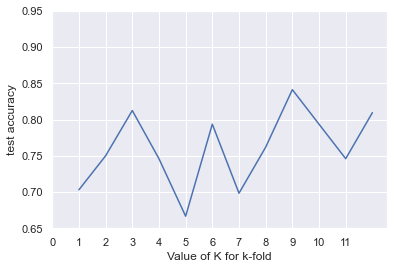

In [89]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 